In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
images = pd.read_csv ("data/train.csv")
images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
images.shape

(42000, 785)

# 785 ==> pixels , qui est : 28 * 28

In [4]:
test = images.iloc[1,1:]

In [5]:
label = images.iloc[1,0]
label

0

In [6]:
test.shape

(784L,)

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


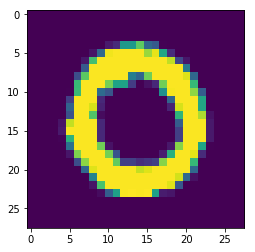

In [7]:
plt.imshow(test.reshape(28,28))
plt.show()

In [8]:
numbers=images.label.unique()

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


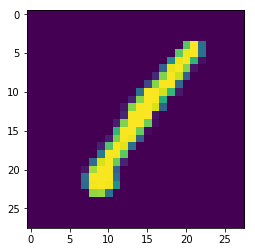

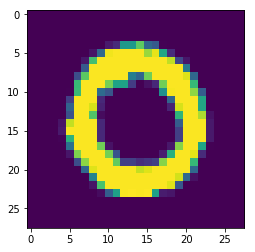

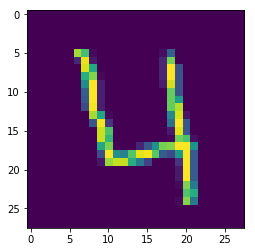

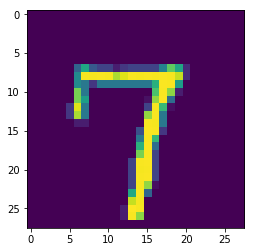

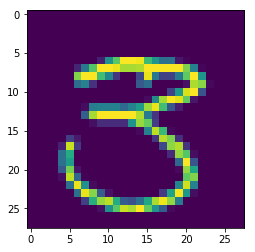

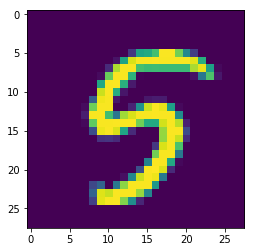

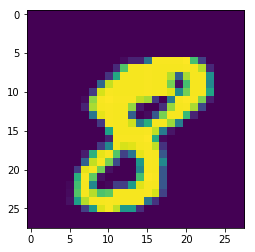

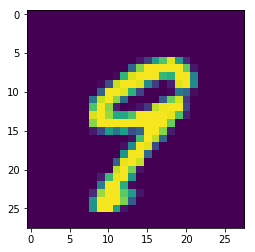

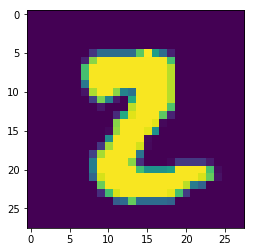

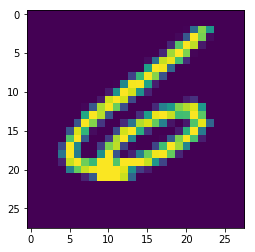

In [9]:
for number in numbers:
    sample = images[images.label==number].iloc[0,1:]
    plt.imshow(sample.reshape(28,28))
    plt.show()

### Classifying how many pictures of 6 , 5 , 2 ...

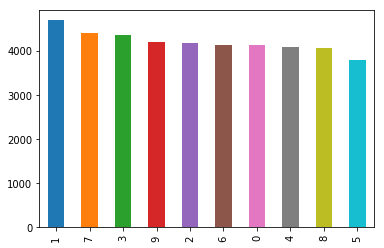

In [10]:
images.label.value_counts().plot(kind="bar")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train,test = train_test_split(images,test_size=0.3)

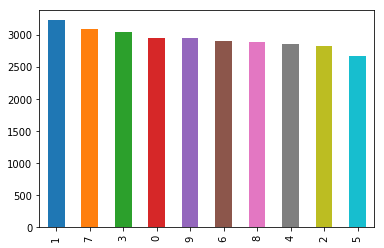

In [13]:
train.label.value_counts().plot(kind="bar")

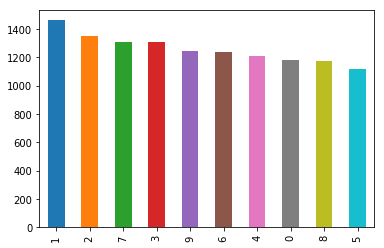

In [14]:
test.label.value_counts().plot(kind="bar")

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
help (StratifiedShuffleSplit)

Help on class StratifiedShuffleSplit in module sklearn.model_selection._split:

class StratifiedShuffleSplit(BaseShuffleSplit)
 |  Stratified ShuffleSplit cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a merge of StratifiedKFold and
 |  ShuffleSplit, which returns stratified randomized folds. The folds
 |  are made by preserving the percentage of samples for each class.
 |  
 |  Note: like the ShuffleSplit strategy, stratified random splits
 |  do not guarantee that all folds will be different, although this is
 |  still very likely for sizeable datasets.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default 10
 |      Number of re-shuffling & splitting iterations.
 |  
 |  test_size : float, int, None, optional
 |      If float, should be between 0.0 and 1.0 and represent the proportion
 |      of the dataset to include in the test s

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=300,n_jobs=-1)

In [19]:
train_y=train.pop("label")
test_y=test.pop ("label")

In [20]:
rf.fit(train,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
pred=rf.predict(test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred)

0.9623809523809523

In [23]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((12600L,), (12600L,))


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,1162,0,2,1,3,1,6,0,6,1,1182
1,0,1439,5,5,3,0,2,4,4,0,1462
2,6,4,1305,5,4,0,3,11,8,2,1348
3,2,7,18,1232,0,18,1,7,12,9,1306
4,2,3,3,0,1170,0,3,1,3,27,1212
5,5,3,2,11,2,1071,9,1,8,9,1121
6,6,1,2,0,3,9,1213,0,6,0,1240
7,3,5,11,1,6,0,0,1259,3,20,1308
8,6,4,8,10,5,5,8,2,1114,13,1175


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
gb= GradientBoostingClassifier(n_estimators=10)
knn=KNeighborsClassifier(n_jobs=-1)

In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
voting_classifier = VotingClassifier(estimators=[('rf',rf),
                                                ('gb',gb),
                                                ('knn',knn)],
                                    n_jobs=-1)

In [28]:
voting_classifier.fit(train,train_y)

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: c:\users\lenovo\appdata\local\temp\joblib_memmaping_pool_4316_488899472
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...wski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

# pred = voting_classifierifier.predict(test)

# accuracy_score(pred,test_y)